# Data Science Workflow

## News Aggragator

### Submitted By - Shruti Gurudas Patil

### Enrollment number : 102138

# Introduction : 

In this project I extracted news about differnt topics such as India, Sports, Business from 'Times Of India' newspaper, which is widely read by Indian people. Webpage link for the same - https://timesofindia.indiatimes.com/ and made topic classification and sentiment analysis of this news. For topic classification I trained classifier to predict topic of differnt news. For sentiment analysis I just used already pre-trained model to classify news on positive and negative and neutral ones. 

Complete Data science Lifecycle is followed for this project

# News data Collection :  
In this step, Data is collected by web scraping of news articles with the help of selenium from the TimesOfIndia News and . The data such as  "Category", "Title", "Published Date", "Author", "Content" is scraped from the website and stored into a CSV file.
The is extracted from different categories such as 'India', 'World', 'Business', 'Sports', 'Entertainment'.

In [1]:
!pip install newspaper3k

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB 1.3 MB/s eta 0:00:06
     - -------------------------------------- 0.3/7.4 MB 3.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/7.4 MB 7.2 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.4 MB 9.8 MB/s eta 0:00:01
     ------------- -------------------------- 2.4/7.4 MB 11.1 MB/s eta 0:00:01
     ----------------- ---------------------- 3.2/7.4 MB 12.0 MB/s eta 0:00:01
     --------------------- ------------------ 4.0/7.4 MB 12.6 MB/s eta 0:00:01
     ------------------------- -------------- 4.8/7.4 MB 13.2 MB/s eta 0:00:01
     ----------------------------- ---------- 5.4/7.4 MB 13.3 MB/s eta 0:00:01
     --------------------------------- ---


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import newspaper
newspaper.languages()


Your available languages are:

input code		full name
  ar			  Arabic
  be			  Belarusian
  bg			  Bulgarian
  da			  Danish
  de			  German
  el			  Greek
  en			  English
  es			  Spanish
  et			  Estonian
  fa			  Persian
  fi			  Finnish
  fr			  French
  he			  Hebrew
  hi			  Hindi
  hr			  Croatian
  hu			  Hungarian
  id			  Indonesian
  it			  Italian
  ja			  Japanese
  ko			  Korean
  mk			  Macedonian
  nb			  Norwegian (Bokmål)
  nl			  Dutch
  no			  Norwegian
  pl			  Polish
  pt			  Portuguese
  ro			  Romanian
  ru			  Russian
  sl			  Slovenian
  sr			  Serbian
  sv			  Swedish
  sw			  Swahili
  tr			  Turkish
  uk			  Ukrainian
  vi			  Vietnamese
  zh			  Chinese



In [14]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
    --------------------------------------- 0.1/9.6 MB 8.3 MB/s eta 0:00:02
   - -------------------------------------- 0.4/9.6 MB 5.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/9.6 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.6 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.6 MB 6.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.6 MB 6.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.6 MB 7.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.6 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.6 MB 8.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.6 MB 8.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.6 MB 8.5 MB/s eta 0:00:01
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
pip install chromedriver-autoinstaller

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Web Scraping the Times of India news using selenium and newspaper3k library

In [41]:
import time
import csv
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from newspaper import Article
from newspaper import Config

# Selenium Setup
chrome_driver_path = 'C:/Users/shrut/chromedriver-win64/chromedriver-win64/chromedriver.exe'  # Replace with your ChromeDriver path
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# Configuring newspaper3k
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
config = Config()
config.browser_user_agent = user_agent

# CSV File Setup
csv_file = "TimesOfIndia_scraped.csv"
fieldnames = ["Category", "Title", "Published Date", "Author", "Content"]
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

# Function to fetch news data from each article
def fetch_article_data(url, category):
    try:
        article = Article(url, config=config)
        article.download()
        article.parse()
        
        title = article.title if article.title else "No Title"
        publish_date = article.publish_date if article.publish_date else "No Date"
        author = article.authors if article.authors else ["Unknown"]
        content = article.text if article.text else "No Content"
        
        # Append the data to CSV
        with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writerow({
                "Category": category,
                "Title": title,
                "Published Date": publish_date,
                "Author": ', '.join(author),
                "Content": content
            })
    except Exception as e:
        print(f"Error processing article: {url} | Error: {e}")

# Function to scrape data from each category
def scrape_category(category_name, category_url):
    driver.get(category_url)
    time.sleep(5)  # Wait for the page to load completely
    
    try:
        # Collect article links using the updated XPath
        article_links = driver.find_elements(By.XPATH, "//a[contains(@href, '/articleshow/')]")
        urls = [link.get_attribute('href') for link in article_links if link.get_attribute('href')]

        if not urls:
            return

        for url in urls:
            fetch_article_data(url, category_name)
    except Exception as e:
        print(f"Error scraping category {category_name}: {e}")

# Function to dynamically fetch category links
def get_category_links():
    homepage_url = 'https://timesofindia.indiatimes.com/'
    driver.get(homepage_url)
    time.sleep(5)  # Wait for the page to load
    
    categories = {}
    
    # Dynamically find category links by class name or other attributes
    category_elements = driver.find_elements(By.XPATH, "//a[@class='rxTTw  null undefined']")  # Update XPath
    
    for elem in category_elements:
        category_name = elem.get_attribute('aria-label')
        category_url = elem.get_attribute('href')
        
        # Filter for categories of interest
        if category_name in ['India', 'World', 'Business', 'Sports', 'Entertainment']:
            categories[category_name] = category_url
    
    return categories

# Scraping each category without intermediate print statements
categories = get_category_links()  # Get the category links dynamically
for category, url in categories.items():
    scrape_category(category, url)

# Close the Selenium driver
driver.quit()

# Optional: Convert CSV to pandas DataFrame for further analysis and print results
df = pd.read_csv(csv_file)

print(f"\nScraped and CSV is ready!! :) ")



Scraped and CSV is ready!! :) 


In [151]:
df = pd.read_csv('TimesOfIndia_scraped.csv')
df.head(5)

,Category,Title,Published Date,Author,Content
0,India,Indian student sets Guinness world record with...,No Date,Unknown,"Tapala Nadamuni , a 23-year-old student from I..."
1,India,"Man kills daughters, hangs self in Prayagraj",No Date,Unknown,PRAYAGRAJ : A 35-year-old man allegedly stabbe...
2,India,Bangladesh plans Sheikh Hasina's extradition t...,No Date,Unknown,NEW DELHI: The newly formed interim government...
3,India,'If PDP had not been founded ...': Mehbooba Mu...,No Date,Unknown,NEW DELHI: People's Democratic Party ( PDP ) s...
4,India,Man recently back from Mpox-affected country i...,No Date,Unknown,"NEW DELHI: A young male patient , who recently..."


## Data Cleaning

In [139]:
import pandas as pd
import numpy as np
import re

# Load data
try:
    df = pd.read_csv('TimesOfIndia_scraped.csv')
except Exception as e:
    print(f"Error loading CSV file: {e}")
    df = pd.DataFrame()  # Create an empty DataFrame if loading fails

# Check the initial DataFrame
print("Initial DataFrame:")
print(df.head())
print(f"Number of rows: {len(df)}")

# Function to extract and clean place names from the beginning of content
def extract_place_and_content(text):
    place_pattern = r'^([A-Za-z\s]+):\s*(.*)'
    match = re.match(place_pattern, text)
    if match:
        place_name = match.group(1).strip()
        content = match.group(2).strip()
        return place_name, content
    else:
        return None, text  # No place name detected, return original content

# Apply the function to extract places and clean content
df[['Place Name', 'Content']] = df['Content'].apply(lambda x: pd.Series(extract_place_and_content(x)))

# Check DataFrame after extraction
print("DataFrame after extracting place names:")
print(df.head())
print(f"Number of rows after extraction: {len(df)}")

# 1. Handle Missing Values
df['Title'].replace('', np.nan, inplace=True)
df['Content'].replace('', np.nan, inplace=True)

# Check missing values
print("Missing values:")
print(f"Missing Titles: {df['Title'].isna().sum()}")
print(f"Missing Content: {df['Content'].isna().sum()}")

# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        return text.strip()  # Remove leading and trailing spaces
    return text  # If text is not a string, return it as is

# Clean the text data
df['Title'] = df['Title'].apply(clean_text)
df['Content'] = df['Content'].apply(clean_text)
df['Place Name'] = df['Place Name'].apply(clean_text)  # Clean place names if needed

# Check DataFrame after cleaning text
print("DataFrame after cleaning text:")
print(df.head())
print(f"Number of rows after cleaning text: {len(df)}")

# Remove duplicates based on 'Title' and 'Content'
df.drop_duplicates(subset=['Title', 'Content'], inplace=True)

# Optional: Normalize Text (convert to lowercase)
df['Title'] = df['Title'].str.lower()
df['Content'] = df['Content'].str.lower()
df['Place Name'] = df['Place Name'].str.lower()

# Final Output: Save the cleaned data back to CSV or analyze further
df.to_csv('cleaned_news_data_with_place_10.csv', index=False)

# Show the cleaned data and total number of articles
print("Final cleaned DataFrame:")
print(df.head())
print(f"\nTotal Cleaned Articles: {len(df)}")


Initial DataFrame:
  Category                                              Title Published Date  \
0    India  Indian student sets Guinness world record with...        No Date   
1    India       Man kills daughters, hangs self in Prayagraj        No Date   
2    India  Bangladesh plans Sheikh Hasina's extradition t...        No Date   
3    India  'If PDP had not been founded ...': Mehbooba Mu...        No Date   
4    India  Man recently back from Mpox-affected country i...        No Date   

    Author                                            Content  
0  Unknown  Tapala Nadamuni , a 23-year-old student from I...  
1  Unknown  PRAYAGRAJ : A 35-year-old man allegedly stabbe...  
2  Unknown  NEW DELHI: The newly formed interim government...  
3  Unknown  NEW DELHI: People's Democratic Party ( PDP ) s...  
4  Unknown  NEW DELHI: A young male patient , who recently...  
Number of rows: 1049
DataFrame after extracting place names:
  Category                                             

In [152]:
data = pd.read_csv('cleaned_news_data_with_place_10.csv')
data.head()

,Category,Title,Published Date,Author,Content,Place Name
0,India,indian student sets guinness world record with...,No Date,Unknown,tapala nadamuni a 23yearold student from indi...,NaN
1,India,man kills daughters hangs self in prayagraj,No Date,Unknown,a 35yearold man allegedly stabbed two of his m...,prayagraj
2,India,bangladesh plans sheikh hasinas extradition to...,No Date,Unknown,the newly formed interim government in banglad...,new delhi
3,India,if pdp had not been founded mehbooba mufti la...,No Date,Unknown,peoples democratic party pdp supremo mehboob...,new delhi
4,India,man recently back from mpoxaffected country id...,No Date,Unknown,a young male patient who recently returned fr...,new delhi


In [153]:

data.drop(columns=['Published Date'], inplace=True)
print(data.head())

  Category                                              Title   Author  \
0    India  indian student sets guinness world record with...  Unknown   
1    India        man kills daughters hangs self in prayagraj  Unknown   
2    India  bangladesh plans sheikh hasinas extradition to...  Unknown   
3    India  if pdp had not been founded  mehbooba mufti la...  Unknown   
4    India  man recently back from mpoxaffected country id...  Unknown   

                                             Content Place Name  
0  tapala nadamuni  a 23yearold student from indi...        NaN  
1  a 35yearold man allegedly stabbed two of his m...  prayagraj  
2  the newly formed interim government in banglad...  new delhi  
3  peoples democratic party  pdp  supremo mehboob...  new delhi  
4  a young male patient  who recently returned fr...  new delhi  


In [154]:
#  new order of the columns
new_column_order = ['Category', 'Place Name', 'Title', 'Author', 'Content']

# Reorder the columns
data = data[new_column_order]

print(data.head())


  Category Place Name                                              Title  \
0    India        NaN  indian student sets guinness world record with...   
1    India  prayagraj        man kills daughters hangs self in prayagraj   
2    India  new delhi  bangladesh plans sheikh hasinas extradition to...   
3    India  new delhi  if pdp had not been founded  mehbooba mufti la...   
4    India  new delhi  man recently back from mpoxaffected country id...   

    Author                                            Content  
0  Unknown  tapala nadamuni  a 23yearold student from indi...  
1  Unknown  a 35yearold man allegedly stabbed two of his m...  
2  Unknown  the newly formed interim government in banglad...  
3  Unknown  peoples democratic party  pdp  supremo mehboob...  
4  Unknown  a young male patient  who recently returned fr...  


In [155]:
data['Category'].value_counts()

Category
Business         146
Tech             124
World            112
Entertainment     93
India             91
Sports            87
Name: count, dtype: int64

## Sentimental analysis and Distribution

In [156]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Get the polarity score (-1 to 1)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis to the 'Content' column
data['Sentiment'] = data['Content'].apply(get_sentiment)

# Display the DataFrame with the new 'Sentiment' column
print(data[['Content', 'Sentiment']].head())


                                             Content Sentiment
0  tapala nadamuni  a 23yearold student from indi...  Positive
1  a 35yearold man allegedly stabbed two of his m...  Negative
2  the newly formed interim government in banglad...  Positive
3  peoples democratic party  pdp  supremo mehboob...  Positive
4  a young male patient  who recently returned fr...  Negative


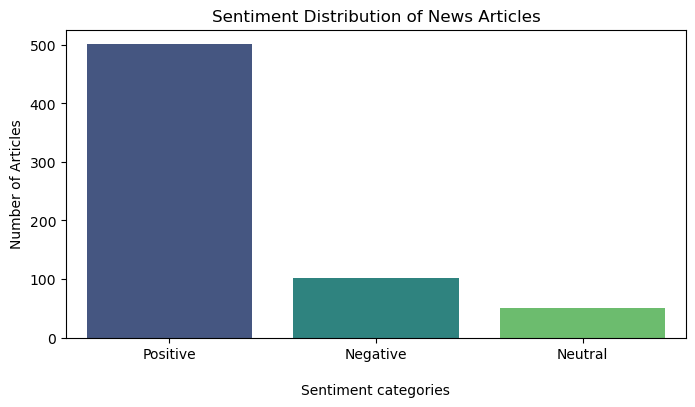

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('\nSentiment categories')
plt.ylabel('Number of Articles')
plt.title('Sentiment Distribution of News Articles')

# Show the plot
plt.show()


In [94]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Visualization - wordcloud

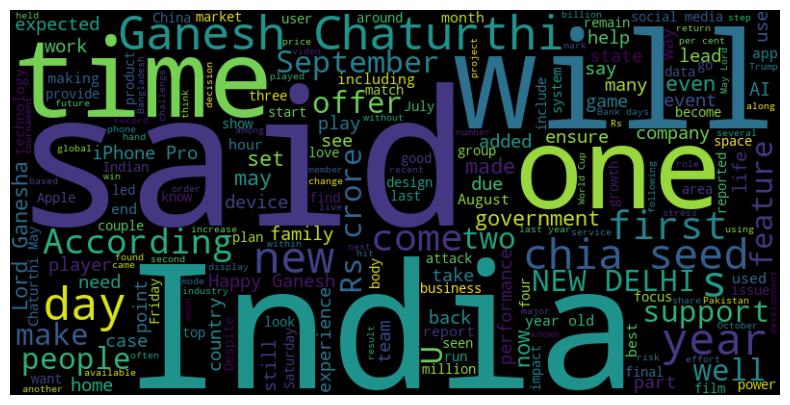

In [159]:

from wordcloud import WordCloud
text = ' '.join(df['Content'].dropna())
wordcloud = WordCloud(width=800, height=400, max_words=200, colormap='viridis').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


## Model planning

In [178]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Preprocess the text data
tfidf = TfidfVectorizer(max_features=5000)  # Convert text to TF-IDF features
X = tfidf.fit_transform(data['Content']).toarray()
y = data['Category']  # Target labels

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB()
}

# 4. Train and evaluate each classifier
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Classifier Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    
    # Save results for confusion matrix
    results[name] = (y_test, y_pred)




Random Forest Classifier Accuracy: 0.67
Classification Report for Random Forest:
                precision    recall  f1-score   support

     Business       0.87      0.90      0.88        50
Entertainment       0.50      0.67      0.57        27
        India       0.75      0.08      0.14        38
       Sports       0.89      0.77      0.83        22
         Tech       0.77      0.84      0.81        32
        World       0.44      0.81      0.57        27

     accuracy                           0.67       196
    macro avg       0.70      0.68      0.63       196
 weighted avg       0.72      0.67      0.63       196


SVM Classifier Accuracy: 0.70
Classification Report for SVM:
                precision    recall  f1-score   support

     Business       0.80      0.94      0.86        50
Entertainment       0.51      0.70      0.59        27
        India       1.00      0.08      0.15        38
       Sports       0.85      0.77      0.81        22
         Tech       0.78 

In [135]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Choosing the ML algorithm 

In [182]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# 1. Preprocess the text data
tfidf = TfidfVectorizer(max_features=5000)  # Convert text to TF-IDF features
X = tfidf.fit_transform(data['Content']).toarray()
y = data['Category']  # Target labels (news category)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize SVM Classifier
svm_classifier = SVC()

# 4. Train the SVM model
svm_classifier.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = svm_classifier.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 7. Output the accuracy and classification report
print(f"SVM Classifier Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


SVM Classifier Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

     Business       0.80      0.94      0.86        50
Entertainment       0.51      0.70      0.59        27
        India       1.00      0.08      0.15        38
       Sports       0.85      0.77      0.81        22
         Tech       0.78      0.91      0.84        32
        World       0.57      0.85      0.69        27

     accuracy                           0.70       196
    macro avg       0.75      0.71      0.66       196
 weighted avg       0.77      0.70      0.65       196



## Prediction

In [186]:
# Example of new article for inference and prediction
new_article = ['''a young male patient  who recently returned from a country
with active mpox monkeypox transmission was identified on sunday as a suspected
case of the diseasethe patient has been isolated in a designated hospital  where
his condition is reported to be stable according to the union health ministry health
officials have collected samples from the patient to confirm whether he has contracted
mpoxthe union health ministry stressed that this case aligns with previous risk assessments 
conducted by the national centre for disease control ncdc and reassured the public that there
is no cause for undue concern at this timethe ncdc had earlier flagged potential risks of mpox transmission 
due to international travel from affected regions and the authorities are closely monitoring the situationfurther
updates are expected as the patients test results are confirmed ''']
# Step 1: Apply TF-IDF transformation to the new article for category prediction
new_article_tfidf = tfidf.transform(new_article).toarray()

# Step 2: Predict the news category using the trained Random Forest Classifier
predicted_category = svm_classifier.predict(new_article_tfidf)

# Step 3: Predict the sentiment of the new article using the get_sentiment function
predicted_sentiment = get_sentiment(new_article[0])  

# Step 4: Output the correctly predicted category and sentiment
print(f"Predicted News Category: {predicted_category[0]}") 
print(f"Predicted Sentiment: {predicted_sentiment}")  


Predicted News Category: India
Predicted Sentiment: Negative
